<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/NB_EstudiosObligatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Participacion de votantes.** Indicador nº 10 de la ISO-37120:

De acuerdo con el objetivo principal del presente TFM, se han recopilado datos de la participacion de los votantes en la ultimas elecciones municipales de Barcelona a nivel de distrito facilitadas por el  Ministerio del Interior. Resultats proclamats per la Junta Electoral Central a traves del portal [www.barcelona.cat
](https://ajuntament.barcelona.cat/estadistica/catala/Estadistiques_per_temes/Eleccions/Eleccions_locals/locevo/index.htm).

## Carga del conjunto de datos


Cargamos en un dataframe el xlsx obtenidos desde el año 1985 hasta 2023 el porcentaje de participacion en la ciudad de Barcelona

In [1]:
# Importamos las librerias necesarias
#import requests
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import viridis
import warnings

In [2]:
def cargar_xlsx(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_excel(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [3]:
# Directorio del indicador 1
directorio ='/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Básico/Educacion/Indicador_10_EstudiosObligatorios'

# Lista de archivos CSV en el directorio
archivos_xlsx = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.xlsx')]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Iterar sobre cada archivo CSV y cargarlo en un DataFrame
for archivo in archivos_xlsx:
    ruta_archivo = os.path.join(directorio, archivo)
    df = cargar_xlsx(ruta_archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en un solo DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [4]:
# Mostramos las primeras filas del dataframe
df_final.head()

,Codi_Districte,Nom_Districte,Any,Sin_Estudios,Solo_Estudios_Obligatorios,Bachillerato,Estudios_Universitarios,Estudios_Obligatorios
0,1,Ciutat Vella,2016,2.8,46.5,20.4,29.0,97.2
1,1,Ciutat Vella,2017,2.4,45.5,20.2,30.6,97.6
2,1,Ciutat Vella,2018,2.1,44.9,20.1,31.6,97.9
3,1,Ciutat Vella,2019,1.8,43.9,20.6,32.3,98.2
4,1,Ciutat Vella,2020,1.6,44.4,20.8,32.1,98.4


In [5]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Codi_Districte              70 non-null     int64  
 1   Nom_Districte               70 non-null     object 
 2   Any                         70 non-null     int64  
 3   Sin_Estudios                70 non-null     float64
 4   Solo_Estudios_Obligatorios  70 non-null     float64
 5   Bachillerato                70 non-null     float64
 6   Estudios_Universitarios     70 non-null     float64
 7   Estudios_Obligatorios       70 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 4.5+ KB


El dataset se compone de un total de 9 columnas:

*   **Codi_Districte:** Codigo del distrito de Barcelona
*   **Nom_Districte:** Nombre del distrito de Barcelona
*   **Any:** Año en el que se recogieron los datos
*   **Sin_estudios:** Porcentaje de poblacion sin estudios
*   **Solo_Estudios_Obligatorios:** Porcentaje de poblacion solo con estudios obligatorios
*   **Bachillerato:** Porcentaje de poblacion con el bachillerato
*   **Estudios_Universitarios:** Porcentaje de poblacion con estudios universitarios
*   **Estudios_Obligatorios:** Porcentaje de poblacion con estudios obligatorios
El dataset tiene un total de 100 filas y missing-values


In [6]:
# Analizamos las variables numericas
df_final.describe()

,Codi_Districte,Any,Sin_Estudios,Solo_Estudios_Obligatorios,Bachillerato,Estudios_Universitarios,Estudios_Obligatorios
count,70.00000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,5.50000,2019.000000,2.227143,37.871429,25.265714,33.090000,97.772857
std,2.89302,2.014441,1.181245,11.552704,2.194584,11.155023,1.181245
min,1.00000,2016.000000,0.400000,16.900000,20.100000,13.300000,94.100000
25%,3.00000,2017.000000,1.325000,27.275000,24.150000,24.975000,97.000000
50%,5.50000,2019.000000,2.000000,42.950000,25.850000,29.650000,98.000000
75%,8.00000,2021.000000,3.000000,45.300000,26.600000,43.575000,98.675000
max,10.00000,2022.000000,5.900000,57.700000,29.600000,53.500000,99.600000


Analizando cada una de las variables numericas vemos que la variable:
*   **Codi_Districte:** aunque es una variable numerica corresponde con valores categoricos.
*   **Any:** es integra y contiene la información correcta.
*   **Sin_Estudios:** es integra y contiene la información correcta.
*   **Solo_Estudios_Obligatorios:** es integra y contiene la información correcta.
*   **Bachillerato:** es integra y contiene la información correcta.
*   **Estudios_Universitarios:** es integra y contiene la información correcta.
*   **Estudios_Obligatorios:** es integra y contiene la información correcta.


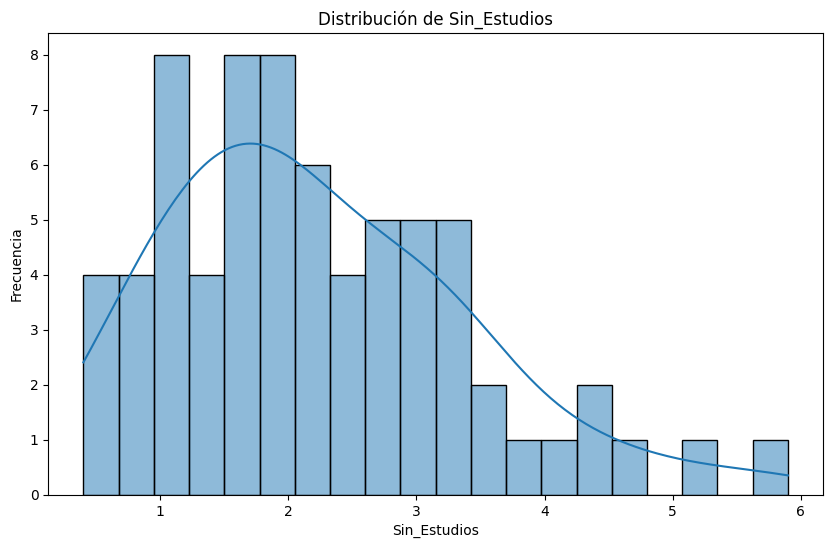

In [7]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Sin_Estudios'], bins=20, kde=True)
plt.title('Distribución de Sin_Estudios')
plt.xlabel('Sin_Estudios')
plt.ylabel('Frecuencia')
plt.show()

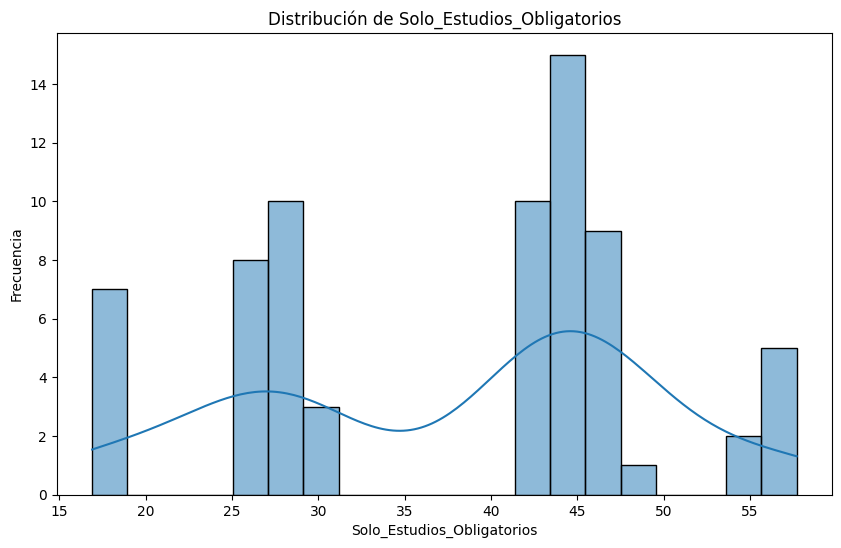

In [8]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Solo_Estudios_Obligatorios'], bins=20, kde=True)
plt.title('Distribución de Solo_Estudios_Obligatorios')
plt.xlabel('Solo_Estudios_Obligatorios')
plt.ylabel('Frecuencia')
plt.show()

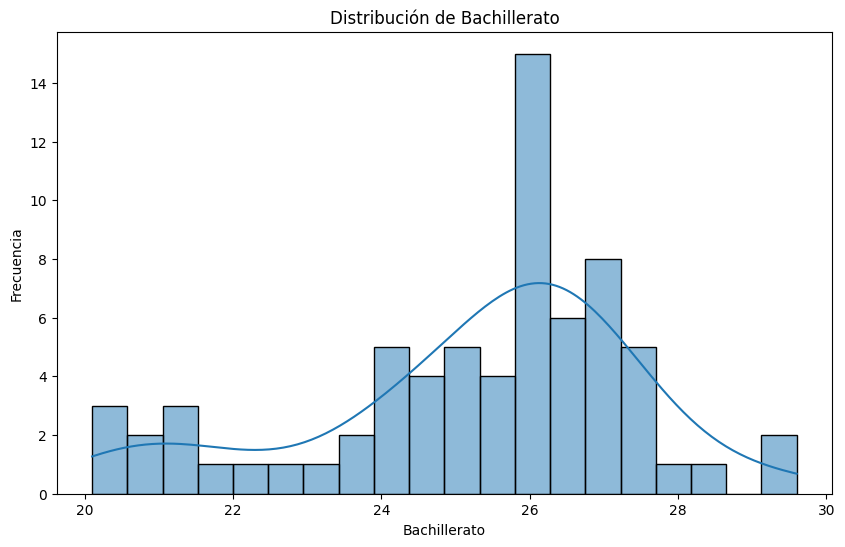

In [9]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Bachillerato'], bins=20, kde=True)
plt.title('Distribución de Bachillerato')
plt.xlabel('Bachillerato')
plt.ylabel('Frecuencia')
plt.show()

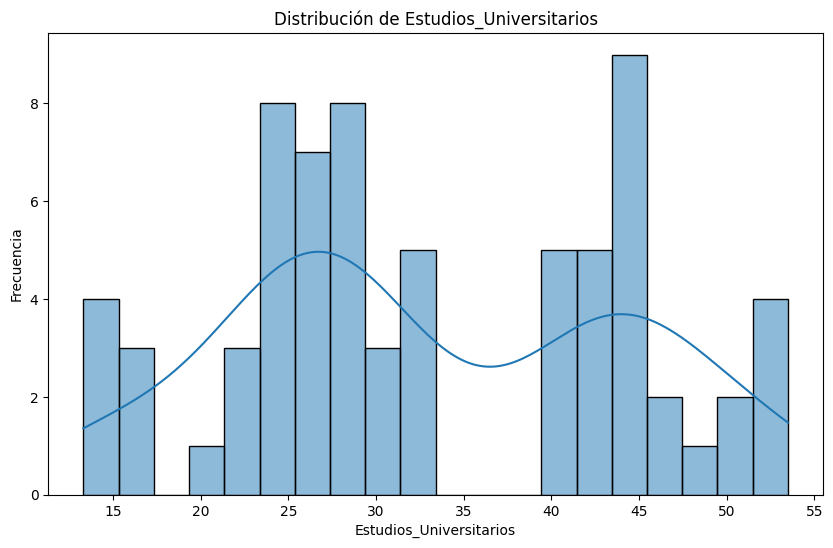

In [10]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Estudios_Universitarios'], bins=20, kde=True)
plt.title('Distribución de Estudios_Universitarios')
plt.xlabel('Estudios_Universitarios')
plt.ylabel('Frecuencia')
plt.show()

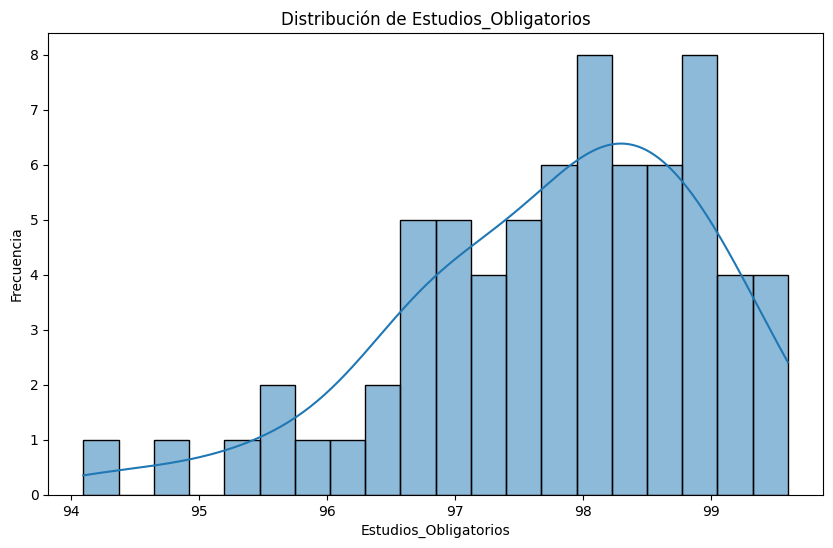

In [11]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Estudios_Obligatorios'], bins=20, kde=True)
plt.title('Distribución de Estudios_Obligatorios')
plt.xlabel('Estudios_Obligatorios')
plt.ylabel('Frecuencia')
plt.show()

## Limpieza de datos

Verificamos que si hay datos faltantes

In [12]:
df_final.isnull().sum()

Codi_Districte                0
Nom_Districte                 0
Any                           0
Sin_Estudios                  0
Solo_Estudios_Obligatorios    0
Bachillerato                  0
Estudios_Universitarios       0
Estudios_Obligatorios         0
dtype: int64

Dado que se trata de un dataset obtenido de un excel manipulado, los datos no necesitan limpieza de datos


## Creación de .csv

Para este indicador solo necesitamos el valor de la variable "Estudios_Oblidatorios", por lo que unicamente nos quedamos con esta

In [18]:
# Seleccionar todas las columnas excepto varias
df_final = df_final.drop(['Sin_Estudios', 'Solo_Estudios_Obligatorios','Bachillerato','Estudios_Universitarios'], axis=1)

In [19]:
df_final.head()

,Codi_Districte,Nom_Districte,Any,Estudios_Obligatorios
0,1,Ciutat Vella,2016,97.2
1,1,Ciutat Vella,2017,97.6
2,1,Ciutat Vella,2018,97.9
3,1,Ciutat Vella,2019,98.2
4,1,Ciutat Vella,2020,98.4


Obtenemos el archivo datosParticipacion.csv con los datos del dataframe resultante

In [20]:
# Guardar el DataFrame en un archivo CSV
df_final.to_csv('/content/drive/MyDrive/UOC/TFM/Datasets definitivos/datos_10_Estudios.csv', index=False)

## Análisis Exploratorio de Datos (EDA)

Una vez tenemos los datos limpios continuamos con la exploracion inicial de los datos

### Variable continua porcentaje de poblacion con estudios obligatorios (Estudios_Obligatorios)

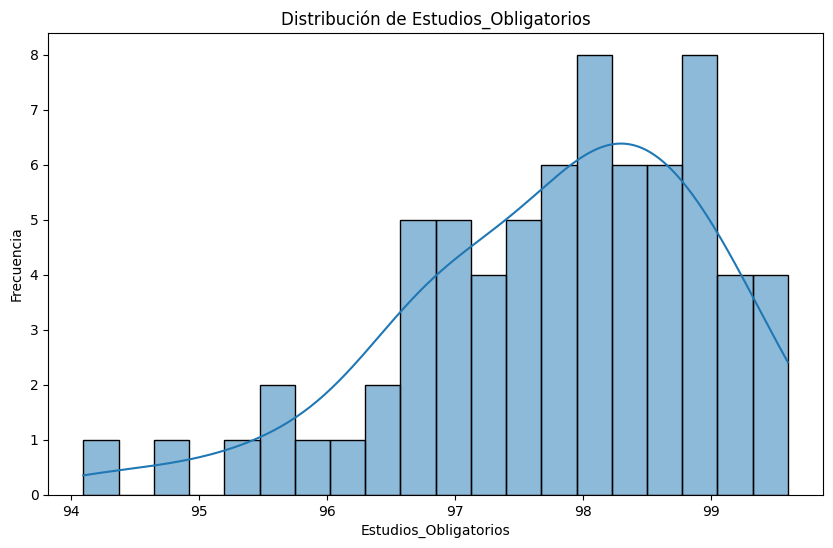

In [21]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Estudios_Obligatorios'], bins=20, kde=True)
plt.title('Distribución de Estudios_Obligatorios')
plt.xlabel('Estudios_Obligatorios')
plt.ylabel('Frecuencia')
plt.show()

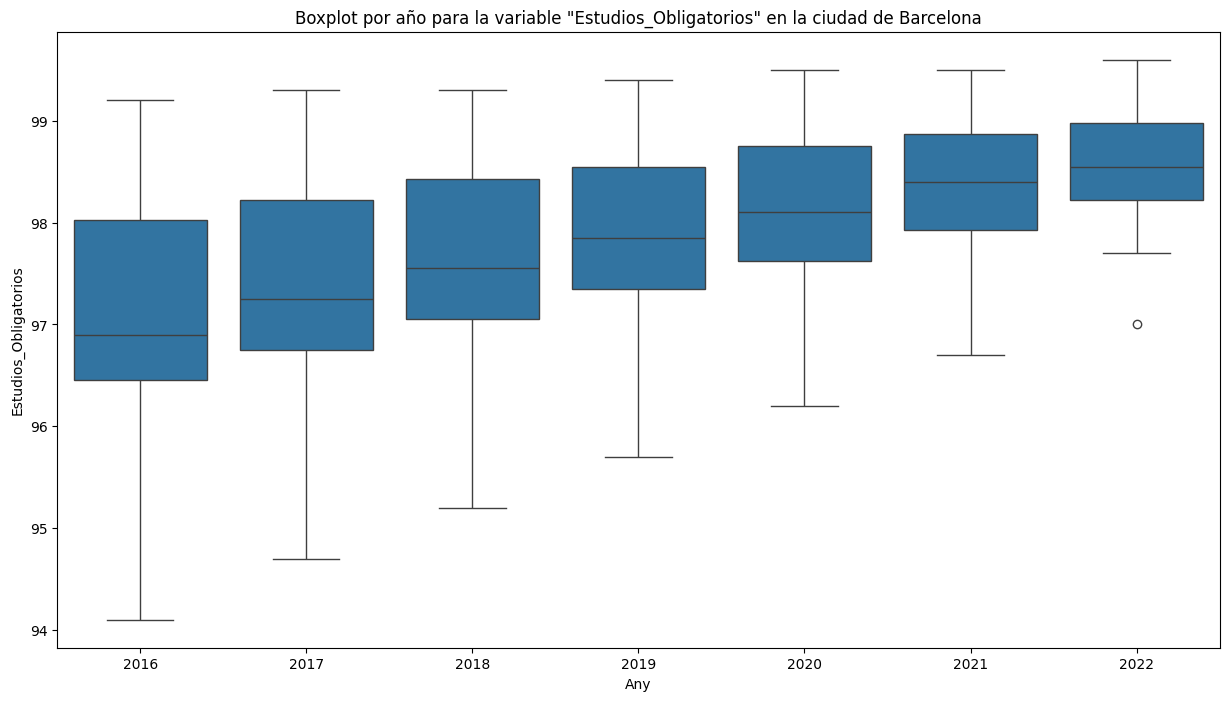

In [ ]:
# Crear diagrama de caja para la variable continua "Estudios_Obligatorios" en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Estudios_Obligatorios', data=df_final)
plt.title('Boxplot por año para la variable "Estudios_Obligatorios" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

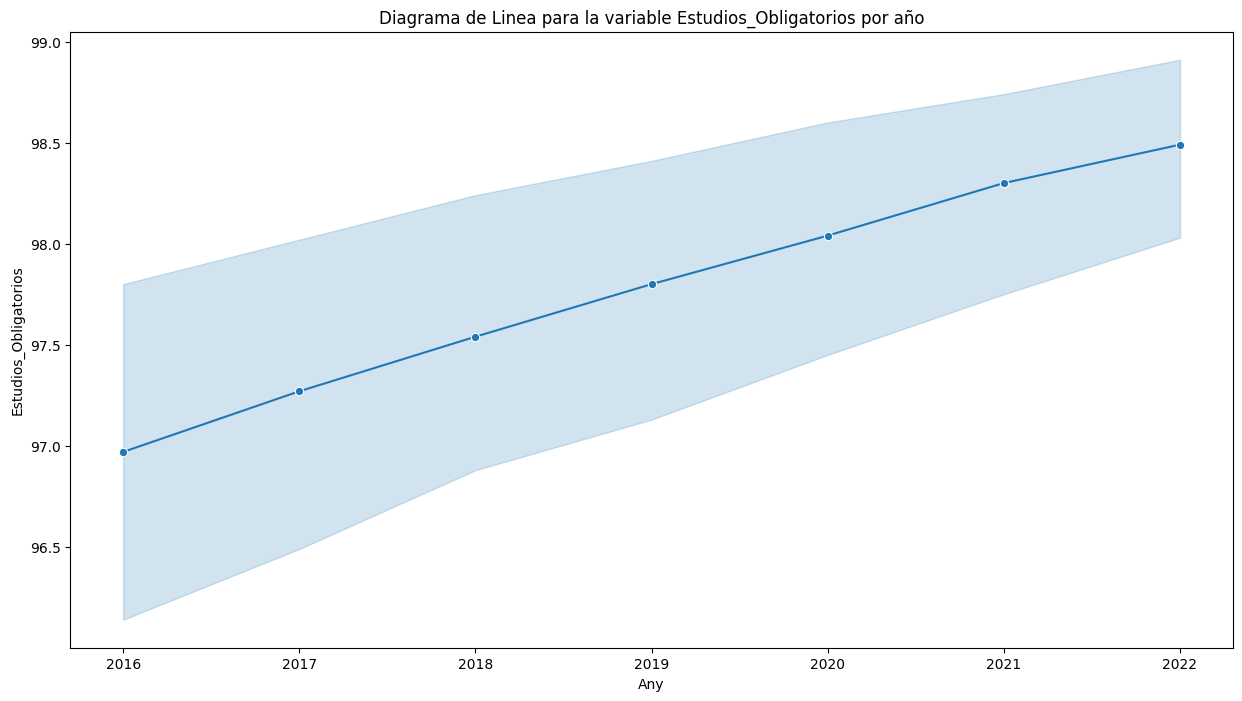

In [ ]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_final, x='Any', y='Estudios_Obligatorios', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Estudios_Obligatorios por año')
plt.xlabel('Any')
plt.ylabel('Estudios_Obligatorios')

plt.show()

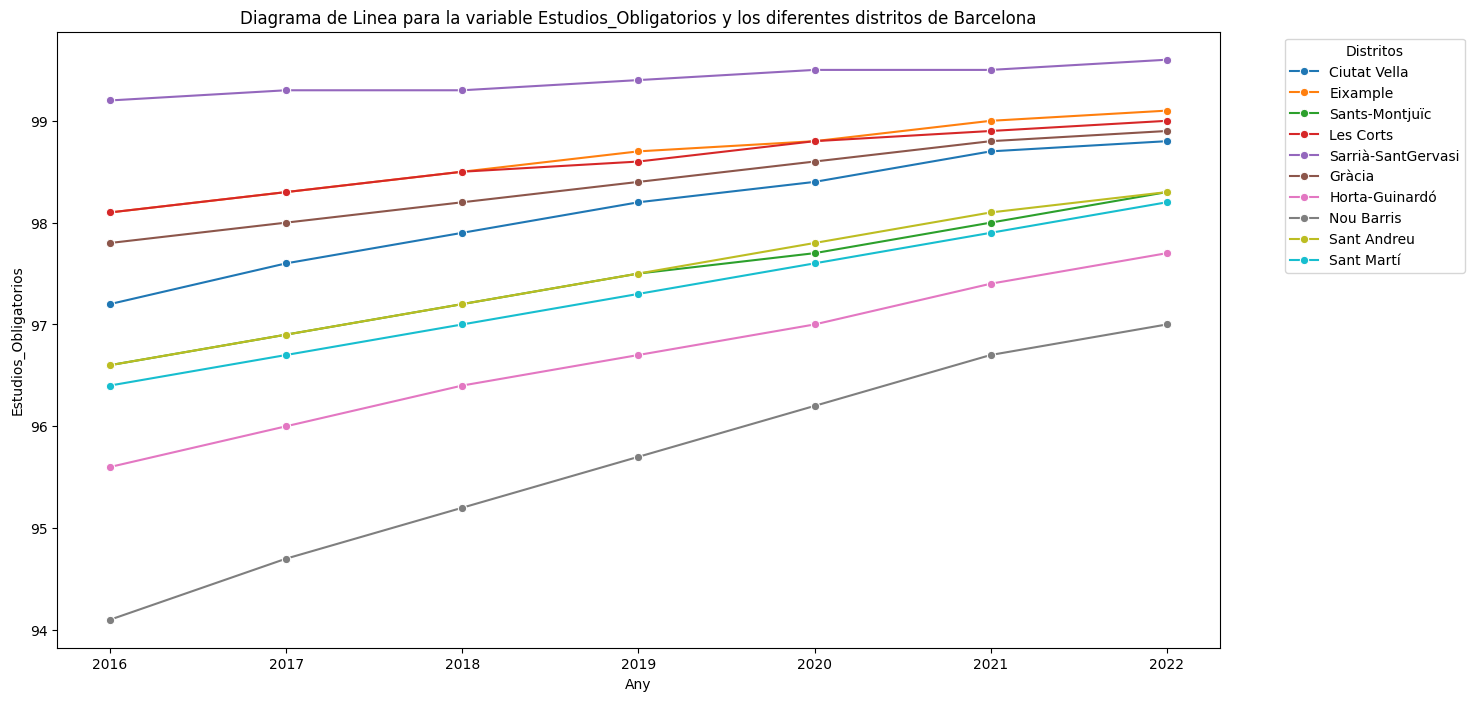

In [ ]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))


sns.lineplot(data=df_final, x='Any', y='Estudios_Obligatorios', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Estudios_Obligatorios y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Estudios_Obligatorios')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_final['Any'].unique())

# Sacamos la leyenda fuera del grafico

plt.show()

## Carga del Shapefile

Cargamos el archivo tipo shape con los 10 distritos de Barcelona

In [ ]:
# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
barcelona_distritos.head()


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [ ]:
# Convertimos el tipo de valor de la variable distrito a entero
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

In [ ]:
# Mostramos la nomenclatura para los graficos posteriores
print (df_final[['Codi_Districte', 'Nom_Districte']].drop_duplicates().to_string(index=False))

 Codi_Districte      Nom_Districte
              1       Ciutat Vella
              2           Eixample
              3     Sants-Montjuïc
              4          Les Corts
              5 Sarrià-SantGervasi
              6             Gràcia
              7     Horta-Guinardó
              8         Nou Barris
              9        Sant Andreu
             10         Sant Martí


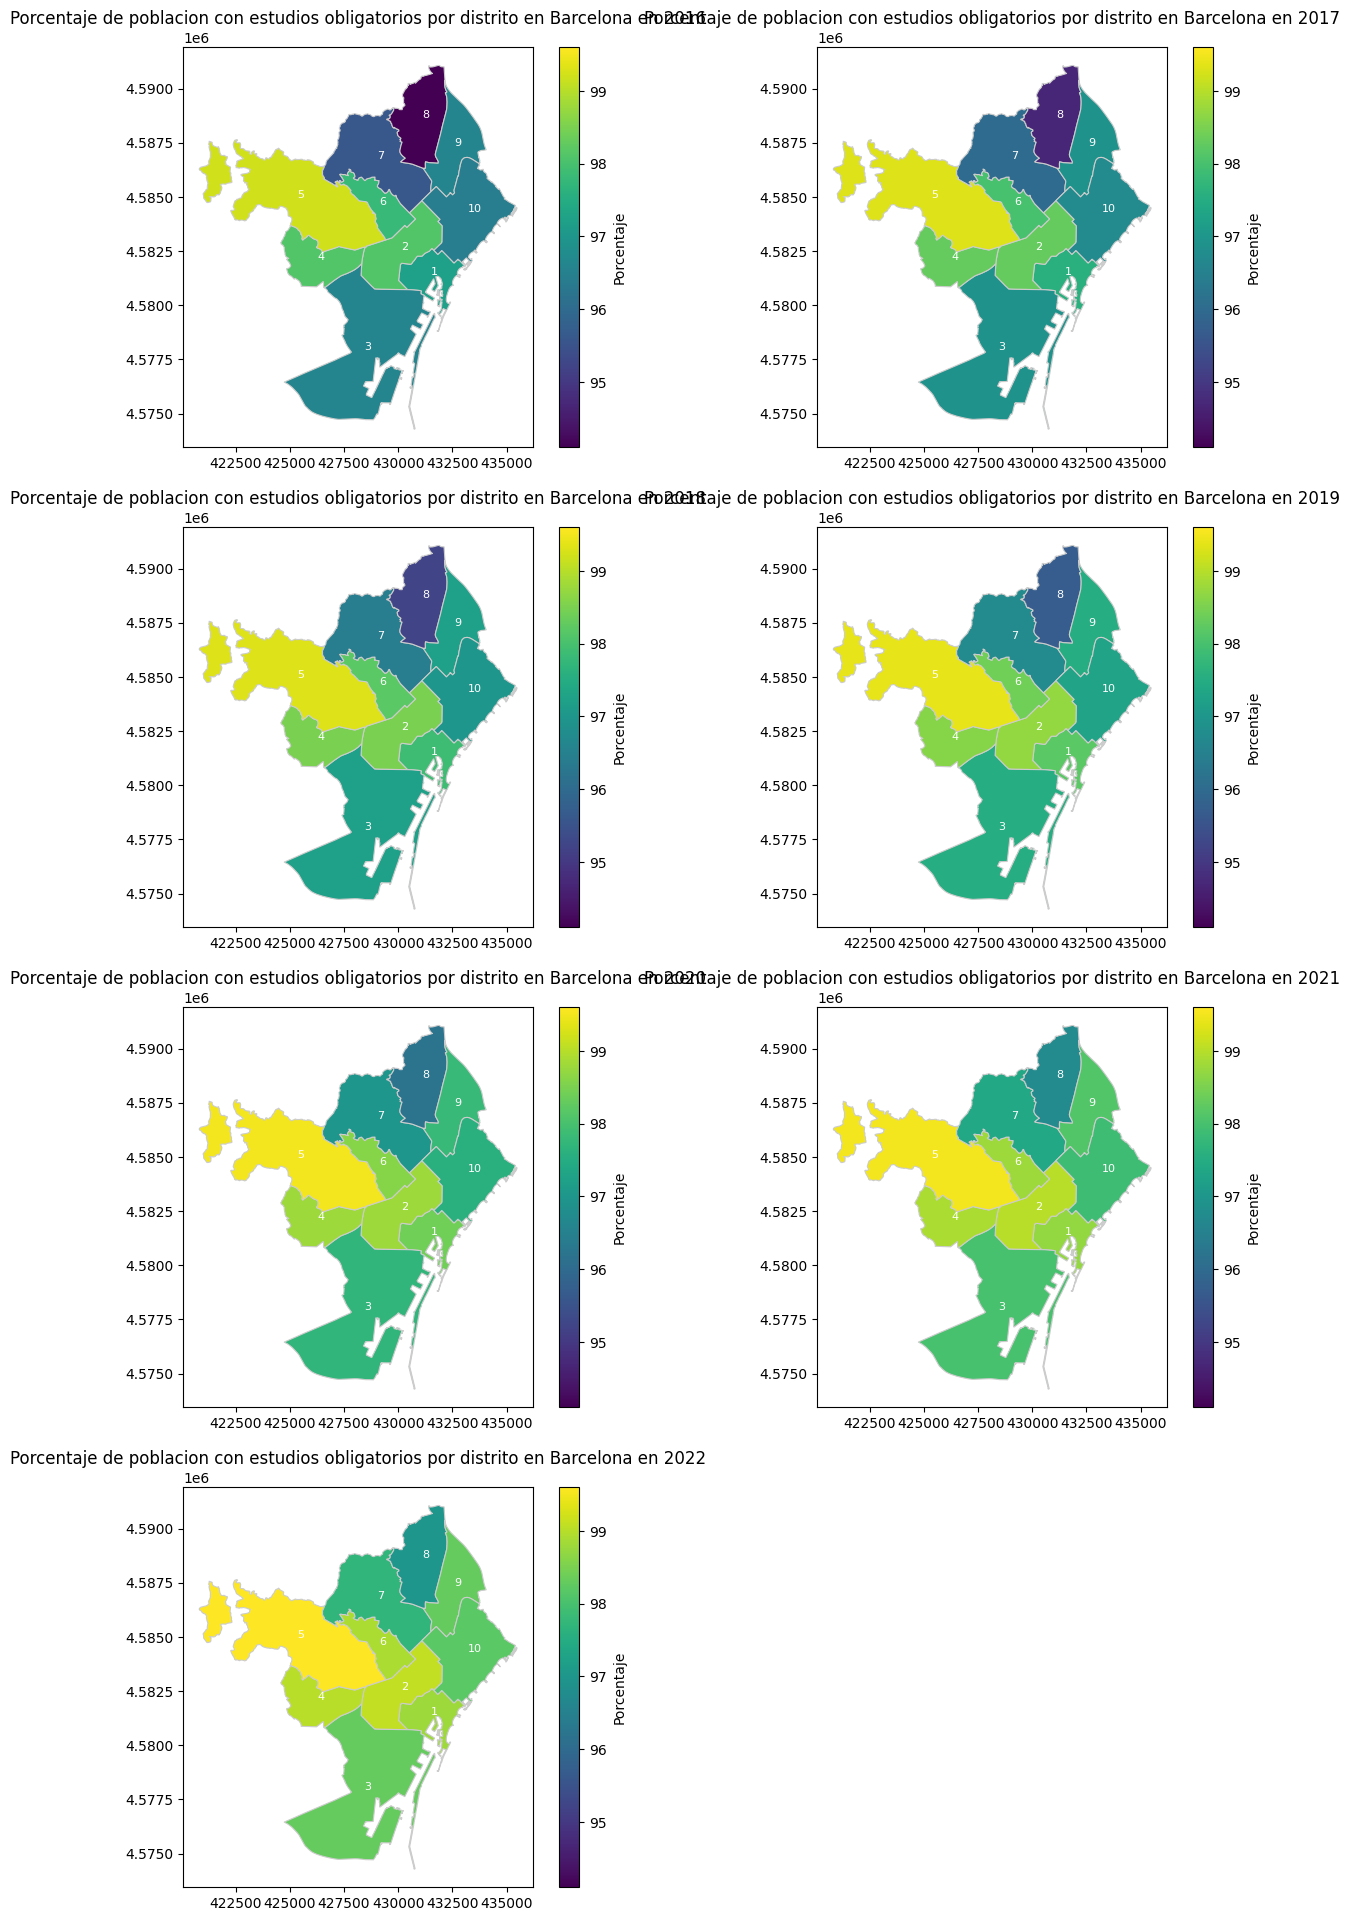

In [ ]:
# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 80))

# Definir el valor máximo y mínimo global
max_global = df_final['Estudios_Obligatorios'].max()
min_global = df_final['Estudios_Obligatorios'].min()

# Crear un colormap Viridis
viridis_cmap = viridis

# Iterar sobre cada año para crear un gráfico para cada uno
for i, year in enumerate(df_final['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    # Filtrar los datos para el año actual
    datos_year = df_final[df_final['Any'] == year]

    # Combinar los datos con el shapefile
    distritos_year = barcelona_distritos.merge(datos_year, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8, color='white')

    # Crear el mapa de los distritos de Barcelona en el año actual con colores
    plt.title(f"Porcentaje de poblacion con estudios obligatorios por distrito en Barcelona en {year}")

    distritos_year.plot(ax=plt.gca(),column='Estudios_Obligatorios', cmap=viridis_cmap, linewidth=0.8, edgecolor='0.8', norm=plt.Normalize(vmin=min_global, vmax=max_global))

    # Añadir una barra de color para mostrar la escala
    sm = plt.cm.ScalarMappable(cmap=viridis_cmap, norm=plt.Normalize(vmin=min_global, vmax=max_global))
    sm._A = []
    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('Porcentaje')  # Establece el nombre de la variable

